# Bike Data Project by Rosalie El Ouardi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import re
import seaborn as sns
import geopandas as gp
from shapely.geometry import Point, Polygon
from bs4 import BeautifulSoup as bs
%matplotlib inline

## Table of Contents

<ul>
    <li><a href="#intro"><b>Introduction</b></a></li>
    <li><a href="#assessment">Assessing Data</a></li>
    <li><a href="#cleaning">Cleaning Data</a></li></ul><ul>
    <li><a href="#uni"><b>Univariate Exploration of Data</b></a></li>
    <li><a href="#q1"><i>Question 1:</i> What are the most common starting and ending station locations?</a></li>
    <li><a href="#q2"><i>Question 2:</i> What is the user type distribution?</a></li>
    <li><a href="#q3"><i>Question 3:</i> Which days are most popular for bike usage?
    <li><a href="#q4"><i>Question 4:</i> What is the length of the average ride?</ul><ul>
    <li><a href="#bi"><b>Bivariate Exploration of Data</b></a></li>
    <li><a href="#q5"><i>Question 5:</i> What is the correlation between day of the week and trip duration?</a></li>
    <li><a href="#q6"><i>Question 6:</i> Which days are the most popular for bike usage by user type?</a></li>
    <li><a href="#q7"><i>Question 7:</i> What is the rental time distribution by user type?</a></li>
    <li><a href="#q8"><i>Question 8:</i> Where are the starting station locations on a map?</a></li></ul><ul>
    <li><a href='#multi'><b>Multivariate Exploration of Data</b></a></li>
    <li><a href="#q9"><i>Question 9:</i> What is the average trip duration per user type per month?</a></li>
        <li><a href="#q10"><i>Question 10:</i> What hours are most popular for bike usage?</a></li></ul><ul>
        <li><a href="#findings"><b>Summation of Findings</b></a></li>
</ul>

<a id='intro'></a>
### Introduction

Ford Go Bikes and Bay Wheels, bike sharing programs through Lyft, have provided us data regarding their trips with the following information: trip duration in seconds, start date and time, end date and time, start and end station IDs, start and end station names, start and end station latitudes, start and end station longitudes, bike id, and user type (where casual means customer and member means subscriber.) 

First I will read in the 2017 data and create a copy.

In [2]:
bike_df = pd.read_csv("2017-fordgobike-tripdata.csv")

In [3]:
bike_df2017 = bike_df.copy()

<a id='assessing'></a>
#### Assessing Data

In [4]:
bike_df2017.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [5]:
bike_df2017.shape

(519700, 13)

In [6]:
bike_df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
bike_df2017.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


<a id='cleaning'></a>
#### Cleaning Data

To gain further insights into the data I created several new columns: start date, start time, end date, end time, starting day of week, ending day of week, duration in minutes, starting month, ending month, starting hour, and ending hour.

In [8]:
bike_df2017['start_time'] = bike_df2017['start_time'].astype('datetime64') 
bike_df2017['end_time'] = bike_df2017['end_time'].astype('datetime64')

In [9]:
bike_df2017['starting_date'] = pd.to_datetime(bike_df2017['start_time']).dt.date
bike_df2017['starting_time'] = pd.to_datetime(bike_df2017['start_time']).dt.time

In [10]:
bike_df2017['ending_date'] = pd.to_datetime(bike_df2017['end_time']).dt.date
bike_df2017['ending_time'] = pd.to_datetime(bike_df2017['end_time']).dt.time

In [11]:
bike_df2017['starting_date'] = bike_df2017['starting_date'].astype('datetime64')

In [12]:
bike_df2017['ending_date'] = bike_df2017['ending_date'].astype('datetime64')

The four new columns are created and the date columns are converted into datatime datatypes. Next, two new columns will be created for the starting day of the week and the ending day of the week for each bike trip. 

In [13]:
bike_df2017['starting_day_of_week'] = bike_df2017['starting_date'].dt.day_name()
bike_df2017['ending_day_of_week'] = bike_df2017['ending_date'].dt.day_name()

Next the creation of a duration column that tracks the length of time in minutes.

In [14]:
bike_df2017['duration_min'] = bike_df2017['duration_sec'] / 60

Next the creation of a month columns.

In [15]:
bike_df2017['starting_month'] = bike_df2017['start_time'].dt.month
bike_df2017['ending_month'] = bike_df2017['end_time'].dt.month

Next, the creation of hour columns.

In [16]:
bike_df2017['starting_hour'] = bike_df2017['start_time'].dt.hour
bike_df2017['ending_hour'] = bike_df2017['end_time'].dt.hour

Here we can see the name changes and added columns. 

In [17]:
bike_df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  object        
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  object        
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

Then I downloaded this cleaned csv file to my computer. 

<a id='uni'></a>
### Univariate Exploration of Data

<a id='q1'></a>
#### Question 1: What are the most common starting and ending station locations?

First we can answer that question programmatically.

In [19]:
bike_df2017.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

In [20]:
bike_df2017.end_station_name.value_counts()

San Francisco Caltrain (Townsend St at 4th St)               17378
San Francisco Ferry Building (Harry Bridges Plaza)           17109
The Embarcadero at Sansome St                                16531
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13658
Montgomery St BART Station (Market St at 2nd St)             13443
                                                             ...  
Pierce Ave at Market St                                          7
Harmon St at Adeline St                                          4
Jackson St at 11th St                                            3
Ellsworth St at Russell St                                       2
Empire St at 1st St                                              2
Name: end_station_name, Length: 272, dtype: int64

But let's see the top 10 starting stations and top 10 ending stations in bar chart form.

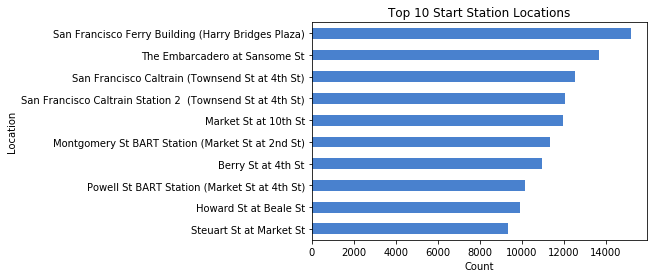

In [21]:
bike_df2017['start_station_name'].value_counts()[:10].plot(kind='barh', color="#4981CE");
plt.title('Top 10 Start Station Locations')
plt.ylabel('Location')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

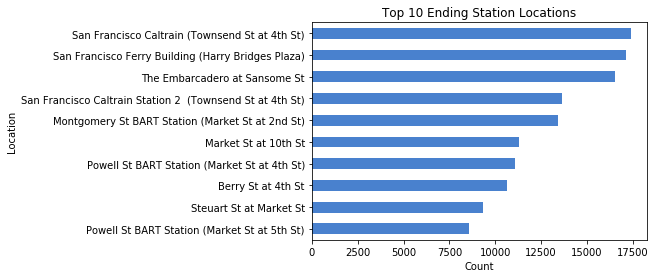

In [22]:
bike_df2017['end_station_name'].value_counts()[:10].plot(kind='barh', color="#4981CE");
plt.title('Top 10 Ending Station Locations')
plt.ylabel('Location')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

There are 9 starting and ending station locations in common, just in a different order in each bar chart. 

<a id='q2'></a>
#### Question 2: What is the user type distribution?

This question can also be answered programmatically. 

In [23]:
bike_df2017.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

Let's see this as a pie chart so we can get a sense of the percentages.

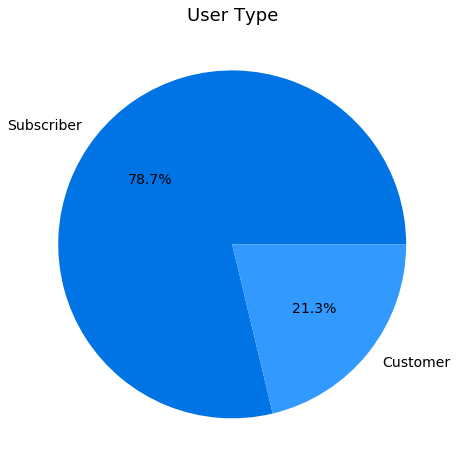

In [24]:
bike_df2017['user_type'].value_counts().plot(kind='pie',figsize=(8,8),autopct='%1.1f%%',fontsize=14,colors = ['#0073e5','#3299ff']);
plt.title('User Type', fontsize=18)
plt.ylabel('')
plt.show()

This pie chart shows us the majority (78.7%) of users are subscribers and minority (21.3%) are just customers.

<a id='q3'></a>
#### Question 3: Which days are most popular for bike usage?

This question can be answered programmatically as well but let's also see it as a bar chart.

In [25]:
bike_df2017.starting_day_of_week.value_counts()

Tuesday      87865
Wednesday    87752
Thursday     85243
Monday       81410
Friday       81165
Saturday     50874
Sunday       45391
Name: starting_day_of_week, dtype: int64

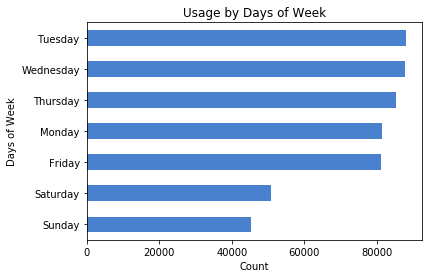

In [26]:
bike_df2017['starting_day_of_week'].value_counts().plot(kind='barh', color="#4981CE");
plt.title('Usage by Days of Week')
plt.ylabel('Days of Week')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.show()

We can see that the weekdays but not the weekend tends to be the most popular time for bike usage. 

<a id='q4'></a>
#### Question 4: What is the length of the average ride?

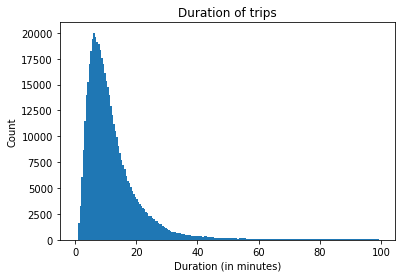

In [27]:
bin_edges = np.arange(0,100,.5)
plt.hist(data = bike_df2017, x = 'duration_min', bins = bin_edges)
plt.title('Duration of trips')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Count')
plt.show()

We can see in the histogram that most trips are under 30 minutes and programmatically we can see that the average trip is close to 10 minutes. 

In [28]:
bike_df2017.duration_min.describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

<a id='bi'></a>
### Bivariate Exploration of Data

<a id='q5'></a>
#### Question 5: What is the correlation between day of the week and trip duration?

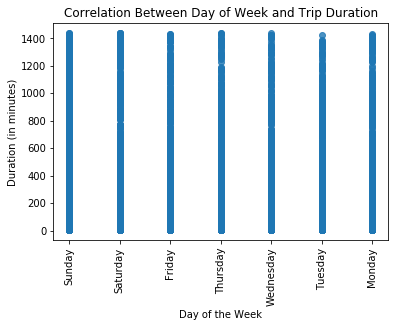

In [29]:
sns.regplot(data = bike_df2017, x = 'starting_day_of_week', y = 'duration_min', fit_reg = False)
plt.xlabel('Day of the Week')
plt.ylabel('Duration (in minutes)')
plt.title('Correlation Between Day of Week and Trip Duration')
plt.xticks(rotation = 90)
plt.show()

I created this scatter plot but unfortunately it told me very little. I tried again next with a violin plot.

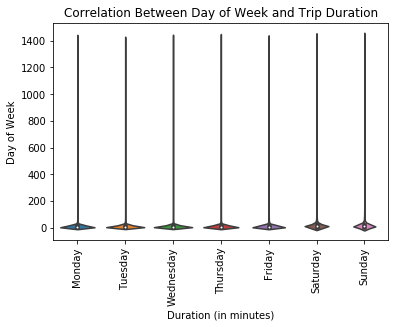

In [72]:
sns.violinplot(data = bike_df2017, x = 'starting_day_of_week', y = 'duration_min')
plt.xticks(rotation = 90)
plt.title('Correlation Between Day of Week and Trip Duration')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Day of Week')
plt.show()

I take this plot to mean that one or more outliers are heavily skewing the data to the point that we can't even see what is actually going on. To manage this I will find this value or values and ignore it or them using the .query method. 

In [31]:
bike_df2017.duration_min.value_counts().sort_index(ascending=True).sort_values(ascending=True) 

1439.483333      1
89.450000        1
89.433333        1
203.033333       1
203.100000       1
              ... 
6.466667       712
6.416667       714
6.050000       714
6.300000       716
5.950000       745
Name: duration_min, Length: 13490, dtype: int64

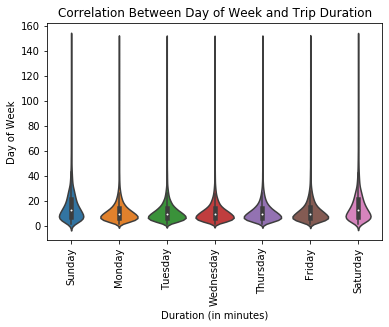

In [32]:
duration = bike_df2017[['starting_day_of_week', 'duration_min']].query('duration_min >=0 & duration_min <= 150')
sns.violinplot(data = duration, x = 'starting_day_of_week', y = 'duration_min', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks(rotation = 90)
plt.xlabel('Duration (in minutes)')
plt.ylabel('Day of Week')
plt.title('Correlation Between Day of Week and Trip Duration')
plt.show()

I interpret this plot to mean, with the density of the weekdays being larger than that of the weekends, that there are more longer rides on the weekends. 

<a id='q6'></a>
#### Question 6: Which days are the most and least popular for bike usage by user type?

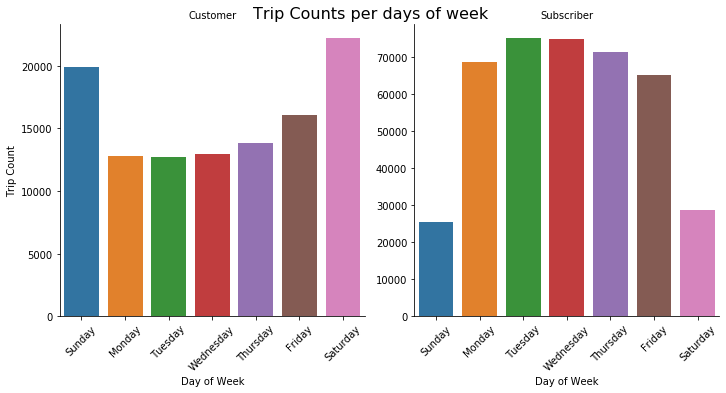

In [33]:
count = sns.catplot(data=bike_df2017, x='starting_day_of_week', col="user_type", kind='count',sharey = False, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
count.set_xticklabels(rotation = 45)
count.set_axis_labels("Day of Week", "Trip Count")
count.set_titles("{col_name}")
count.fig.suptitle("Trip Counts per days of week",fontsize=16);

Previously in question 3, we saw that the weekends were less popular however this is because the amount of subscribers being nearly 80% skewed the data. Looking at these bar charts, it shows that Saturday and Sunday are much more popular for customers whereas Tuesday and Wednesday are much more popular with the subscribers. 

<a id='q7'></a>
#### Question 7: What is the rental time distribution by user type?

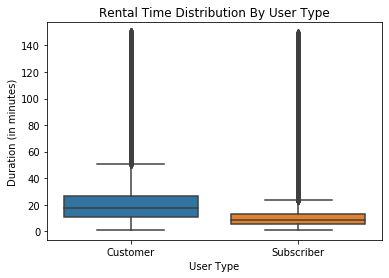

In [34]:
user_duration = bike_df2017[['user_type', 'duration_min']].query('duration_min >=0 & duration_min <= 150')
sns.boxplot(data = user_duration, x = 'user_type', y = 'duration_min')
plt.xlabel('User Type')
plt.ylabel('Duration (in minutes)')
plt.title('Rental Time Distribution By User Type')
plt.show()

Per the graph, customers rent their bikes for longer periods of time.

<a id='q8'></a>
#### Question 8:  Where are the starting station locations on a map?

To see these maps I had to first go to a picture repository of maps and download the json files to read in. I was unsure as to exactly where the locations of all of the stations were was so I started with a map of Calfornia and worked inwards. I also had to install a few different things to be able to finally install and use geopandas. 

In [35]:
ca_area = gp.read_file("stanford-jm667wq2232-geojson.json")

Text(43.55758048204814, 0.5, 'Latitude')

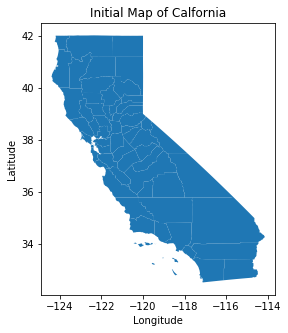

In [77]:
fig,ax = plt.subplots(figsize = (5,5))
ca_area.plot(ax = ax);
plt.title('Initial Map of Calfornia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

This map helped me get the limits of the longitude and latitude of the map so I could make the next one to plot the station locations. But before that I had to establish spacial reference and use a loop so that the coordinates could be used.

In [37]:
crs = "EPSG:4326"
geometry = [Point(xy) for xy in zip(bike_df2017['start_station_longitude'], bike_df2017['start_station_latitude'])]
geo_df = gp.GeoDataFrame(bike_df2017, crs = crs, geometry = geometry)

In [38]:
geo_df.geometry.head()

0    POINT (-122.42624 37.77643)
1    POINT (-122.40088 37.78487)
2    POINT (-122.26776 37.87035)
3    POINT (-122.40945 37.77452)
4    POINT (-122.25876 37.86881)
Name: geometry, dtype: geometry

Here you can see the column establishing the points that will be plotted. The first plot will be for the full map of California. 

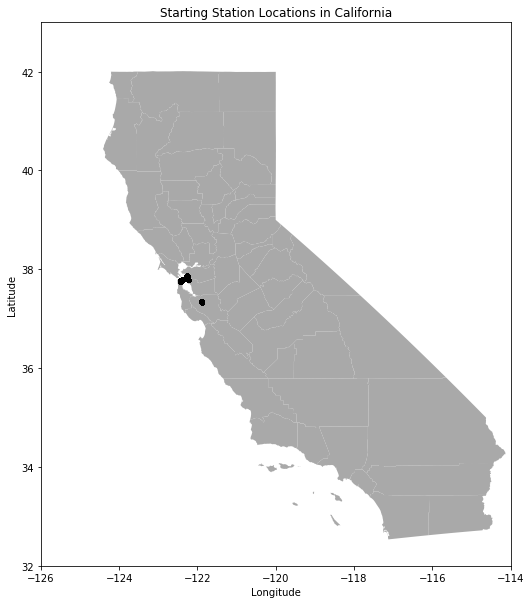

In [73]:
fig,ax = plt.subplots(figsize = (10,10))
ca_area.plot(ax = ax, color='darkgrey');
geo_df.plot(ax = ax, markersize = 10, color = "black", marker = "o",alpha=1);
plt.xlim(-126,-114)
plt.ylim(32,43)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Starting Station Locations in California')
plt.show()

Here we can see that these stations are highly concentrated in what is known as the Bay Area. Next, I will use a map of the Bay Area to zoom in a bit on these stations. 

In [40]:
bay_area = gp.read_file("stanford-ck517xn7937-geojson.json")

Text(18.316594664092513, 0.5, 'Latitude')

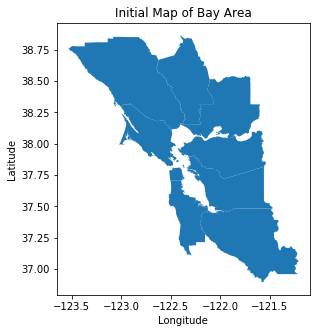

In [78]:
fig,ax = plt.subplots(figsize = (5,5))
bay_area.plot(ax = ax);
plt.title('Initial Map of Bay Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

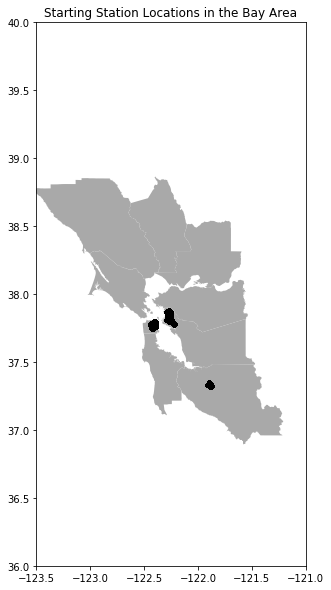

In [42]:
fig,ax = plt.subplots(figsize = (10,10))
bay_area.plot(ax = ax, color='darkgray');
geo_df.plot(ax = ax, markersize = 10, color = "black", marker = "o",alpha=1);
plt.xlim(-123.5,-121)
plt.ylim(36.00,40)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Starting Station Locations in the Bay Area')
plt.show()

Here we can see three locations where the stations are highly concentrated. For the sake of brevity let's look at just one of those locations: San Francisco. 

In [43]:
sf_area = gp.read_file("tufts-sanfrancisconghbrhd04-geojson.json")

Text(50.375, 0.5, 'Latitude')

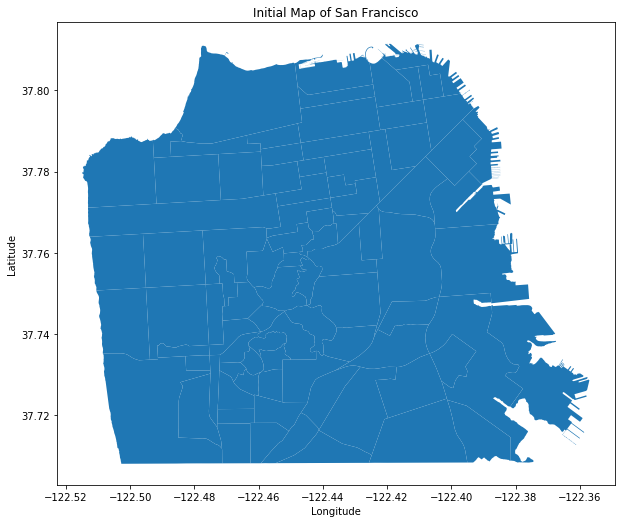

In [79]:
fig,ax = plt.subplots(figsize = (10,10))
sf_area.plot(ax = ax);
plt.title('Initial Map of San Francisco')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

I am also curious as to where the top 5 starting stations were located in relation to all San Francisco based stations. Since the top 5 are all in San Francisco I will use this same map.

The top five starting station locations are as follows: 

(1) San Francisco Ferry Building (Harry Bridges Plaza)           
(2) The Embarcadero at Sansome St                                
(3) San Francisco Caltrain (Townsend St at 4th St)               
(4) San Francisco Caltrain Station 2  (Townsend St at 4th St)    
(5) Market St at 10th St    

In [45]:
bike_df2017.loc[bike_df2017['start_station_name'] ==  'San Francisco Ferry Building (Harry Bridges Plaza)'].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ending_date,ending_time,starting_day_of_week,ending_day_of_week,duration_min,starting_month,ending_month,starting_hour,ending_hour,geometry
261,814,2017-12-31 18:25:37.866,2017-12-31 18:39:12.172,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,90,Townsend St at 7th St,37.771058,...,2017-12-31,18:39:12.172000,Sunday,Sunday,13.566667,12,12,18,18,POINT (-122.39420 37.79539)


In [46]:
bike_df2017.loc[bike_df2017['start_station_name'] ==  'The Embarcadero at Sansome St'].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ending_date,ending_time,starting_day_of_week,ending_day_of_week,duration_min,starting_month,ending_month,starting_hour,ending_hour,geometry
27,862,2017-12-31 23:38:24.874,2017-12-31 23:52:47.542,6,The Embarcadero at Sansome St,37.80477,-122.403234,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2017-12-31,23:52:47.542000,Sunday,Sunday,14.366667,12,12,23,23,POINT (-122.40323 37.80477)


In [47]:
bike_df2017.loc[bike_df2017['start_station_name'] ==  'San Francisco Caltrain (Townsend St at 4th St)'].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ending_date,ending_time,starting_day_of_week,ending_day_of_week,duration_min,starting_month,ending_month,starting_hour,ending_hour,geometry
5,9226,2017-12-31 22:51:00.918,2018-01-01 01:24:47.166,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,2018-01-01,01:24:47.166000,Sunday,Monday,153.766667,12,1,22,1,POINT (-122.39528 37.77660)


In [48]:
bike_df2017.loc[bike_df2017['start_station_name'] ==  'San Francisco Caltrain Station 2  (Townsend St at 4th St)'].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ending_date,ending_time,starting_day_of_week,ending_day_of_week,duration_min,starting_month,ending_month,starting_hour,ending_hour,geometry
12,2183,2017-12-31 23:52:55.581,2018-01-01 00:29:18.743,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,...,2018-01-01,00:29:18.743000,Sunday,Monday,36.383333,12,1,23,0,POINT (-122.39553 37.77664)


In [49]:
bike_df2017.loc[bike_df2017['start_station_name'] ==  'Market St at 10th St'].head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,ending_date,ending_time,starting_day_of_week,ending_day_of_week,duration_min,starting_month,ending_month,starting_hour,ending_hour,geometry
57,490,2017-12-31 23:05:28.919,2017-12-31 23:13:39.489,58,Market St at 10th St,37.776619,-122.417385,56,Koshland Park,37.773414,...,2017-12-31,23:13:39.489000,Sunday,Sunday,8.166667,12,12,23,23,POINT (-122.41739 37.77662)


I created a new dataframe with just the top five starting station names, longtitudes, and latitudes to plot them on the San Francisco map.

In [50]:
data = {'Name':['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)','Market St at 10th St'],'start_station_longitude':['-122.39420','-122.40323','-122.39528','-122.39553','-122.41739'],'start_station_latitude':['37.79539','37.80477','37.77660','37.77664','37.77662']}
top5 = pd.DataFrame(data)

top5

,Name,start_station_longitude,start_station_latitude
0,San Francisco Ferry Building (Harry Bridges Pl...,-122.39420,37.79539
1,The Embarcadero at Sansome St,-122.40323,37.80477
2,San Francisco Caltrain (Townsend St at 4th St),-122.39528,37.77660
3,San Francisco Caltrain Station 2 (Townsend St...,-122.39553,37.77664
4,Market St at 10th St,-122.41739,37.77662


In [51]:
top5['start_station_longitude'] = top5['start_station_longitude'].astype('float64') 
top5['start_station_latitude'] = top5['start_station_latitude'].astype('float64')

In [70]:
crs2 = "EPSG:4326"
geometry_top = [Point(xy) for xy in zip(top5['start_station_longitude'], top5['start_station_latitude'])]
top5_df = gp.GeoDataFrame(top5, crs = crs2, geometry = geometry_top)

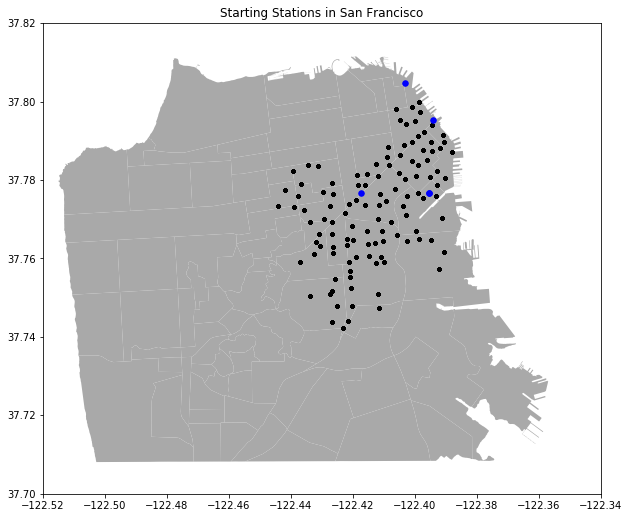

In [71]:
fig,ax = plt.subplots(figsize = (10,10))
sf_area.plot(ax = ax, color='darkgrey', legend=True);
geo_df.plot(ax = ax, markersize = 10, color = "black", marker = "o",alpha=1);
top5_df.plot(ax = ax, markersize = 30, color = "blue", marker = "o",alpha=1);
plt.xlim(-122.52,-122.34)
plt.ylim(37.70,37.82)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title("Starting Stations in San Francisco")
plt.show()

It seems they are all concentrated in the northeast corner of San Francisco and the top stations, as denoted by the blue dots, are in the far northeast corner.

<a id='multi'></a>
### Multivariate Exploration of Data

<a id='q9'></a>
#### Question 9: What is the average trip duration per user type per month?

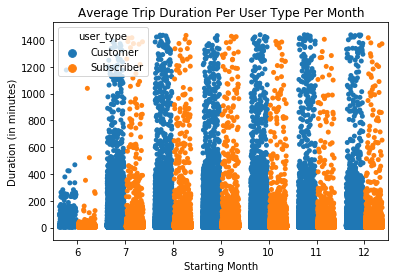

In [80]:
sns.stripplot(data = bike_df2017, x = 'starting_month', y = 'duration_min', hue = 'user_type',
            jitter = 0.35, dodge = True)
plt.title('Average Trip Duration Per User Type Per Month')
plt.xlabel('Starting Month')
plt.ylabel('Duration (in minutes)')
plt.show()

This didn't tell me as much as I liked, but it did tell me in general that August and September had more trips than the last three months of the year. 

<a id='q10'></a>
#### Question 10: What hours are most popular for bike usage?

First let's try this using a strip plot like above.

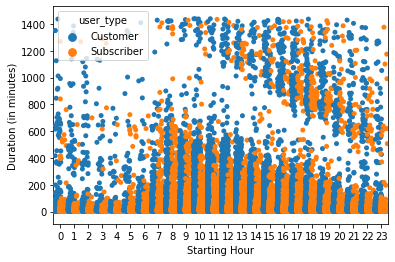

In [55]:
sns.stripplot(data = bike_df2017, x = 'starting_hour', y = 'duration_min', hue = 'user_type',
            jitter = 0.5, dodge = True)
plt.title('Trip Distribution by Hours')
plt.xlabel('Starting Hour')
plt.ylabel('Duration (in minutes)')
plt.show()

Let's try this another way. Although it gives me valuable information I don't think it tells an adequate story about the hours compared to creating a heatmap. First, let's see a heatmap based on the full dataframe and see if there are any good correlations.

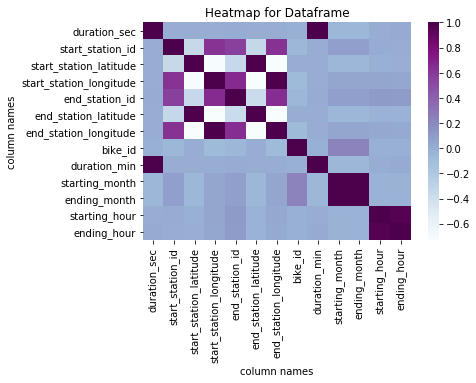

In [82]:
sns.heatmap(bike_df2017.corr(),cmap="BuPu")
plt.title('Heatmap for Dataframe')
plt.xlabel('column names')
plt.ylabel('column names')
plt.show();

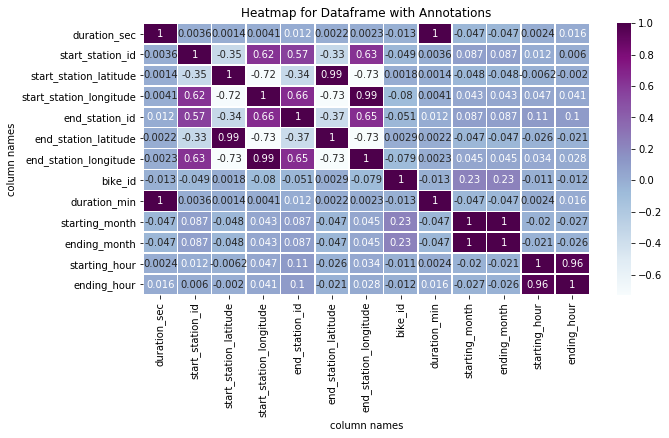

In [83]:
plt.figure(figsize=(10,5))
sns.heatmap(bike_df2017.corr(),annot = True, linewidth=0.5, cmap="BuPu")
plt.title('Heatmap for Dataframe with Annotations')
plt.xlabel('column names')
plt.ylabel('column names')
plt.show()

This heatmap didn't give me more information regarding the data than the information I already had. Also, I noticed after having finished my code for heatmap below that the days of the week were not in order, so I ordered them here to make the heatmap clearer in the difference between weekday and weekend usage. 

In [58]:
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
bike_df2017["starting_day_of_week"] = pd.Categorical(bike_df2017.starting_day_of_week, categories=days, ordered=True)

Now let's start the process of creating a heatmap.

In [59]:
heatmapcolumns = bike_df2017[['duration_min','starting_day_of_week','starting_hour']]
heatmapcolumns

,duration_min,starting_day_of_week,starting_hour
0,1335.166667,Sunday,16
1,1313.333333,Sunday,15
2,762.800000,Sunday,22
3,1036.200000,Sunday,17
4,726.716667,Sunday,14
...,...,...,...
519695,7.250000,Wednesday,10
519696,7.183333,Wednesday,9
519697,7.066667,Wednesday,9
519698,6.100000,Wednesday,9


In [60]:
starting = heatmapcolumns.groupby(['starting_day_of_week','starting_hour']).size()
starting

starting_day_of_week  starting_hour
Monday                0                 219
                      1                  89
                      2                  66
                      3                  31
                      4                 100
                                       ... 
Sunday                19               1939
                      20               1454
                      21               1080
                      22                720
                      23                466
Length: 168, dtype: int64

In [61]:
starting = starting.reset_index()
starting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   starting_day_of_week  168 non-null    category
 1   starting_hour         168 non-null    int64   
 2   0                     168 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 3.3 KB


In [62]:
starting.rename(columns={ starting.columns[2]: "duration_min" }, inplace = True)
starting

,starting_day_of_week,starting_hour,duration_min
0,Monday,0,219
1,Monday,1,89
2,Monday,2,66
3,Monday,3,31
4,Monday,4,100
...,...,...,...
163,Sunday,19,1939
164,Sunday,20,1454
165,Sunday,21,1080
166,Sunday,22,720


In [63]:
starting.pivot('starting_day_of_week','starting_hour','duration_min').head()

starting_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
starting_day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,219,89,66,31,100,359,1616,5215,10926,8052,...,2875,3573,6177,10617,8069,4300,2604,1751,986,457
Tuesday,266,122,85,43,134,423,1942,5765,11740,8566,...,2906,3677,6799,11046,8650,4881,2871,2048,1272,687
Wednesday,282,125,72,35,111,400,1793,5420,11392,8630,...,3155,4052,6574,11102,8783,4637,2863,1880,1167,657
Thursday,295,145,91,35,90,365,1713,5049,10786,8100,...,3159,3800,6462,10609,8052,4669,2916,2167,1384,731
Friday,341,158,86,39,93,376,1410,4203,9694,7688,...,3815,4706,6942,9544,6613,3673,2278,1711,1392,925


In [64]:
starting.pivot('starting_day_of_week','starting_hour')['duration_min'].head()

starting_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
starting_day_of_week,,,,,,,,,,,,,,,,,,,,,
Monday,219,89,66,31,100,359,1616,5215,10926,8052,...,2875,3573,6177,10617,8069,4300,2604,1751,986,457
Tuesday,266,122,85,43,134,423,1942,5765,11740,8566,...,2906,3677,6799,11046,8650,4881,2871,2048,1272,687
Wednesday,282,125,72,35,111,400,1793,5420,11392,8630,...,3155,4052,6574,11102,8783,4637,2863,1880,1167,657
Thursday,295,145,91,35,90,365,1713,5049,10786,8100,...,3159,3800,6462,10609,8052,4669,2916,2167,1384,731
Friday,341,158,86,39,93,376,1410,4203,9694,7688,...,3815,4706,6942,9544,6613,3673,2278,1711,1392,925


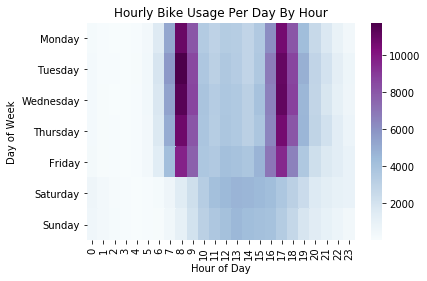

In [81]:
starting_pivot = starting.pivot('starting_day_of_week','starting_hour','duration_min')
sns.heatmap(starting_pivot,cmap="BuPu")
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Hourly Bike Usage Per Day By Hour')
plt.show()

This heatmap shows us that the bike usage on the weekdays is least popular in the early morning or late night hours, more popular in the midday, and most popular around the hours people (or at least people who work standard office hours) go to and leave work. It also shows us on the weekends that midday rides are most popular.

<a id='findings'></a>
### Summation of Findings 

* The top starting and top ending stations were mostly the same and located in the San Francisco area. The stations in general were clustered in three areas in the Bay area. The starting stations were in the northeast corner of San Francisco and the top 5 starting stations were in the far northeast of San Francisco. 
* Subscribers were nearly 80% of the user type for this service in 2017.
* Tuesdays and Wednesdays were more popular usage days than Saturday or Sunday in general but, when analyzed based on user type, the weekends were much more popular with customers and the weekdays were more popular with subscribers. The large amount of subscribers skewed the data. 
* The average trip is nearly 10 minutes and majority of trips are under 30 minutes and trips were in longer duration during the weekends. It also showed these longer trips on the weekends were ones taken by customers and not subscribers. 
* The hours that are most common during the weekdays for bike usage are when work usually starts (7 am to 10 am) and when it ends (5 to 7 pm). On the weekends the usage seems to be more in the midday from 11 am to 5 pm. 

##### Resources

https://knowledge.udacity.com

https://daringfireball.net/projects/markdown/syntax

https://seaborn.pydata.org/tutorial.html

https://matplotlib.org/3.3.1/tutorials/index.html

https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook

https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a

https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns

https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python

https://github.com/plotly/plotly.github.io/issues/110

https://cmdlinetips.com/2019/03/catplot-in-seaborn-python/

https://www.geeksforgeeks.org/python-filtering-data-with-pandas-query-method/

https://seaborn.pydata.org/generated/seaborn.catplot.html

https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

https://www.lfd.uci.edu/~gohlke/pythonlibs/

https://geopandas.org/install.html

https://maps.princeton.edu/catalog/tufts-sanfrancisconghbrhd04

https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

https://geopandas.org/projections.html

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

https://maps.princeton.edu/catalog/stanford-jm667wq2232

https://maps.princeton.edu/catalog/stanford-ck517xn7937

https://www.youtube.com/watch?v=ZSwXRn50lnA

https://www.youtube.com/watch?v=m7uXFyPN2Sk

https://github.com/mGalarnyk/Python_Tutorials/blob/master/Request/Heat%20Maps%20using%20Matplotlib%20and%20Seaborn.ipynb

https://stackoverflow.com/questions/43759921/pandas-rename-column-by-position

https://stackoverflow.com/questions/53575689/pandas-groupby-how-to-sort-weekdays-in-the-correct-order-when-creating-groupby

https://stackedit.io/app#